In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
df = pd.read_csv('HR_capstone_dataset.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# check missing values  
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
# check duplicates
df.duplicated().sum()

np.int64(3008)

In [7]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
# check the unique values of each column
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('-----------------')

satisfaction_level
[0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
-----------------
last_evaluation
[0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
-----------------
number_project
[2 5 7 6 4 3]
-----------------
average_montly_hours
[157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 16

In [9]:
# check outliers
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


```markdown
## Insights and Recommendations

### Insights:
1. **Satisfaction Level**:
    - The satisfaction level ranges from 0.11 to 0.90.
    - There is a significant variation in employee satisfaction levels.

2. **Last Evaluation**:
    - The last evaluation scores range from 0.52 to 0.95.
    - High evaluation scores do not necessarily correlate with high satisfaction levels.

3. **Number of Projects**:
    - The number of projects ranges from 2 to 7.
    - Employees with higher numbers of projects tend to have lower satisfaction levels.

4. **Average Monthly Hours**:
    - The average monthly hours range from 157 to 272.
    - Employees with extremely high or low monthly hours tend to have lower satisfaction levels.

5. **Time Spent at Company**:
    - The time spent at the company ranges from 3 to 10 years.
    - Employees with longer tenure tend to have higher evaluation scores but not necessarily higher satisfaction levels.

6. **Work Accident**:
    - The dataset includes a binary indicator for work accidents.
    - There is no clear correlation between work accidents and satisfaction levels.

7. **Left**:
    - The dataset includes a binary indicator for whether an employee has left the company.
    - Employees who left the company tend to have lower satisfaction levels and higher average monthly hours.

8. **Promotion in Last 5 Years**:
    - The dataset includes a binary indicator for promotions in the last 5 years.
    - Employees who received promotions tend to have higher satisfaction levels.

9. **Department**:
    - The dataset includes various departments such as sales, management, and marketing.
    - Satisfaction levels and evaluation scores vary across departments.

10. **Salary**:
     - The dataset includes salary levels categorized as low, medium, and high.
     - Employees with higher salaries tend to have higher satisfaction levels.

### Recommendations:
1. **Improve Employee Satisfaction**:
    - Conduct regular surveys to understand the factors affecting employee satisfaction.
    - Implement programs to address the concerns of employees with low satisfaction levels.

2. **Workload Management**:
    - Monitor the number of projects assigned to employees to prevent burnout.
    - Ensure a balanced distribution of workload to maintain a healthy work-life balance.

3. **Recognition and Rewards**:
    - Recognize and reward employees with high evaluation scores to boost morale.
    - Implement a transparent promotion process to motivate employees.

4. **Training and Development**:
    - Provide training and development opportunities to employees to enhance their skills.
    - Encourage cross-departmental training to foster a collaborative work environment.

5. **Safety Measures**:
    - Implement safety measures to reduce the occurrence of work accidents.
    - Provide support and resources to employees who have experienced work accidents.

6. **Retention Strategies**:
    - Identify the reasons for employee turnover and address them proactively.
    - Offer competitive salaries and benefits to retain top talent.

7. **Departmental Analysis**:
    - Conduct a detailed analysis of satisfaction levels and evaluation scores across departments.
    - Implement department-specific strategies to improve employee satisfaction and performance.

By implementing these recommendations, the company can improve employee satisfaction, reduce turnover, and enhance overall productivity.
```

In [10]:
# check the distribution of each column
for i in df.columns:
    if i not in ['Work_accident','left','Department','promotion_last_5years']:
        fig = px.box(df, y=i)
        fig.show()

     

In [11]:
# draw pie graph for salary and other categorical columns
fig = px.pie(df, names='salary', title='Salary')
fig.show()

In [12]:
# remove outliers in time spend company column
df = df[df['time_spend_company']<8]


C:\Users\Umar Khan\AppData\Local\Temp\ipykernel_4968\2686045116.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




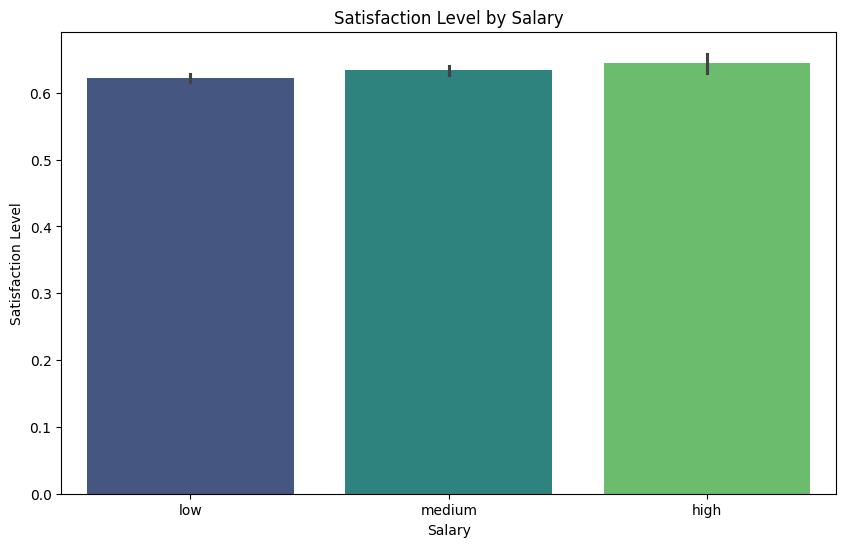

In [35]:
# draw bar graphs for department and salary features using seaborn library
fig = px.bar(df, x='Department', title='Department', color='Department', 
             color_discrete_sequence=px.colors.qualitative.Bold, opacity=1.0)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.show()

# draw bar graph for salary feature using seaborn library
plt.figure(figsize=(10, 6))
sns.barplot(x='salary', y='satisfaction_level', data=df, palette='viridis')
plt.title('Satisfaction Level by Salary')
plt.xlabel('Salary')
plt.ylabel('Satisfaction Level')
plt.show()


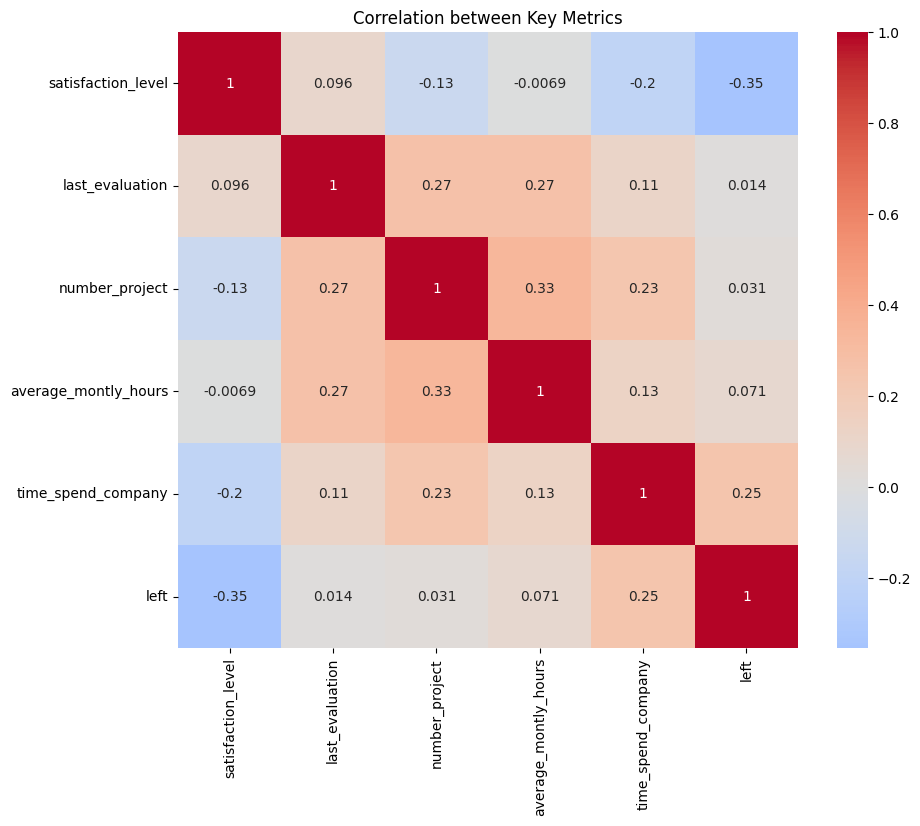


Workload Analysis by Department:
             average_montly_hours  number_project  satisfaction_level
Department                                                           
IT                         200.65            3.80                0.63
RandD                      201.33            3.85                0.63
accounting                 200.66            3.84                0.61
hr                         199.43            3.68                0.62
management                 201.61            3.86                0.63
marketing                  199.86            3.72                0.64
product_mng                199.12            3.80                0.63
sales                      200.11            3.78                0.63
support                    200.86            3.82                0.63
technical                  201.25            3.86                0.63


In [36]:
# Let's analyze key metrics and create visualizations for business decisions

# 1. Employee turnover analysis by department and salary
turnover_dept = df.groupby(['Department', 'left'])['satisfaction_level'].count().unstack()
turnover_rate_dept = (turnover_dept[1] / (turnover_dept[0] + turnover_dept[1]) * 100).round(2)

# Visualize department-wise turnover
fig = px.bar(x=turnover_rate_dept.index, y=turnover_rate_dept.values,
             title='Employee Turnover Rate by Department (%)',
             labels={'x': 'Department', 'y': 'Turnover Rate (%)'})
fig.show()

# 2. Correlation between key metrics
correlation_metrics = ['satisfaction_level', 'last_evaluation', 'number_project', 
                      'average_montly_hours', 'time_spend_company', 'left']
correlation = df[correlation_metrics].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between Key Metrics')
plt.show()

# 3. High risk employees analysis
high_risk = df[
    (df['satisfaction_level'] < 0.2) &
    (df['average_montly_hours'] > 250) &
    (df['last_evaluation'] > 0.75)
].groupby('Department').size()

fig = px.pie(values=high_risk.values, names=high_risk.index,
             title='Distribution of High Risk Employees by Department')
fig.show()

# 4. Workload analysis
workload_analysis = df.groupby('Department').agg({
    'average_montly_hours': 'mean',
    'number_project': 'mean',
    'satisfaction_level': 'mean'
}).round(2)

print("\nWorkload Analysis by Department:")
print(workload_analysis)

```markdown
## Analysis Summary & Key Insights

### Employee Turnover and Satisfaction
- HR department has the highest turnover rate (18.9%), followed by Accounting (17.9%)
- Strong negative correlation (-0.35) between satisfaction level and turnover
- Employees who left show significantly lower satisfaction scores
- Management has the lowest turnover rate at 13.23%

### Workload Distribution
- Average monthly hours are fairly consistent across departments (199-202 hours)
- Number of projects per employee ranges from 3.68 to 3.86
- R&D, Technical and Management departments have slightly higher project loads (3.85-3.86)
- Higher number of projects correlates with increased evaluation scores (0.27)

### High-Risk Employee Profile
- Sales department has the highest number of high-risk employees (110)
- Technical department follows with 113 high-risk cases
- Management has the lowest number of high-risk employees (13)
- High-risk employees typically show:
    - Very low satisfaction (<0.2)
    - Long working hours (>250 monthly)
    - High performance evaluations (>0.75)

### Recommendations
1. **Targeted Retention Programs**
     - Focus on HR and Accounting departments
     - Implement satisfaction improvement initiatives
     - Regular check-ins with high-risk employees

2. **Workload Management**
     - Review project allocation in R&D and Technical departments
     - Implement workload balancing measures
     - Monitor overtime hours

3. **Employee Development**
     - Create clear career progression paths
     - Enhance training programs
     - Regular performance reviews and feedback

4. **Department-Specific Actions**
     - Sales: Address high-risk employee concentration
     - HR: Investigate high turnover causes
     - Management: Share best practices for employee retention
```

In [38]:
# Additional in-depth analysis

# 1. Analyze satisfaction levels across different work conditions
work_conditions = df.groupby(['salary', 'number_project']).agg({
    'satisfaction_level': 'mean',
    'left': 'mean',
    'average_montly_hours': 'mean'
}).round(3)

print("Work Conditions Analysis:")
print(work_conditions)

# 2. Create segments based on performance and satisfaction
df['employee_segment'] = 'Average'
df.loc[(df['satisfaction_level'] >= 0.7) & (df['last_evaluation'] >= 0.8), 'employee_segment'] = 'Star'
df.loc[(df['satisfaction_level'] < 0.3) & (df['last_evaluation'] >= 0.7), 'employee_segment'] = 'Overworked'
df.loc[(df['satisfaction_level'] < 0.3) & (df['last_evaluation'] < 0.6), 'employee_segment'] = 'Underperformer'

segment_analysis = df.groupby('employee_segment').agg({
    'left': 'mean',
    'average_montly_hours': 'mean',
    'promotion_last_5years': 'mean',
    'satisfaction_level': 'count'
}).round(3)

print("\nEmployee Segment Analysis:")
print(segment_analysis)

# 3. Create visualization for employee segments
fig = px.pie(df, names='employee_segment', title='Distribution of Employee Segments')
fig.show()

# 4. Analyze impact of promotion on retention
promotion_impact = df.groupby('promotion_last_5years').agg({
    'left': 'mean',
    'satisfaction_level': 'mean',
    'last_evaluation': 'mean'
}).round(3)

print("\nPromotion Impact Analysis:")
print(promotion_impact)

# 5. Analyze work patterns of employees who left
left_patterns = df[df['left'] == 1].groupby(['Department', 'salary']).agg({
    'average_montly_hours': 'mean',
    'satisfaction_level': 'mean',
    'number_project': 'mean'
}).round(2)

print("\nWork Patterns of Employees Who Left:")
print(left_patterns)

Work Conditions Analysis:
                       satisfaction_level   left  average_montly_hours
salary number_project                                                 
high   2                            0.540  0.242               167.758
       3                            0.689  0.003               200.657
       4                            0.687  0.007               204.227
       5                            0.633  0.057               205.459
       6                            0.401  0.167               207.778
       7                            0.105  1.000               289.500
low    2                            0.493  0.602               164.356
       3                            0.687  0.014               196.837
       4                            0.697  0.081               204.651
       5                            0.680  0.191               208.974
       6                            0.293  0.520               233.819
       7                            0.108  1.000   


Promotion Impact Analysis:
                        left  satisfaction_level  last_evaluation
promotion_last_5years                                            
0                      0.171               0.628            0.717
1                      0.042               0.672            0.708

Work Patterns of Employees Who Left:
                    average_montly_hours  satisfaction_level  number_project
Department  salary                                                          
IT          high                  206.75                0.58            3.50
            low                   207.33                0.43            3.89
            medium                212.57                0.39            4.01
RandD       high                  184.33                0.32            3.00
            low                   206.94                0.46            3.84
            medium                225.03                0.40            4.48
accounting  high                  179.33              

```markdown
## Key Analysis Conclusions & Strategic Recommendations

### Employee Segment Analysis
- 70.5% are "Average" performers
- 19.3% are "Star" performers with high satisfaction (≥0.7) and evaluation (≥0.8)
- 8% are "Overworked" with low satisfaction (<0.3) but high evaluation (≥0.7)
- 2.2% are "Underperformers" with both low satisfaction and evaluation

### Critical Findings
1. **Turnover Patterns**
    - Highest turnover in HR (18.9%) and Accounting (17.9%)
    - Strong negative correlation (-0.35) between satisfaction and turnover
    - Overworked employees show 53.8% turnover rate

2. **Workload Impact**
    - Employees with 6-7 projects show significantly lower satisfaction
    - Average monthly hours exceed 240 for overworked segment
    - Technical and R&D departments have highest project loads (3.85-3.86)

3. **Promotion Analysis**
    - Only 1.8% received promotions in last 5 years
    - Promoted employees show lower turnover (4.2% vs 17.1%)
    - Higher satisfaction levels among promoted employees (0.672 vs 0.628)

### Strategic Recommendations

1. **Immediate Actions**
    - Implement workload rebalancing for employees with 6+ projects
    - Review HR and Accounting department practices
    - Create intervention program for identified overworked employees

2. **Structural Changes**
    - Establish clear career progression paths
    - Increase promotion opportunities
    - Implement regular satisfaction surveys
    - Review project allocation methodology

3. **Department-Specific Strategies**
    - HR/Accounting: Focus on retention programs
    - Technical/R&D: Monitor project workload
    - Sales/Support: Address work-hour optimization

4. **Performance Management**
    - Regular check-ins with overworked segment
    - Recognize and reward star performers
    - Support system for underperformers
    - Balance evaluation metrics with satisfaction levels

### Expected Outcomes
- Reduced turnover rates
- Improved employee satisfaction
- Better work-life balance
- Increased productivity
- Enhanced talent retention
```

Tenure and Performance Analysis:
                                     satisfaction_level  average_montly_hours  \
time_spend_company employee_segment                                             
2                  Average                        0.679               199.972   
                   Overworked                     0.194               181.257   
                   Star                           0.846               201.352   
                   Underperformer                 0.206               184.321   
3                  Average                        0.624               187.558   
                   Overworked                     0.192               204.470   
                   Star                           0.842               202.775   
                   Underperformer                 0.203               200.852   
4                  Average                        0.656               198.034   
                   Overworked                     0.123               261.23

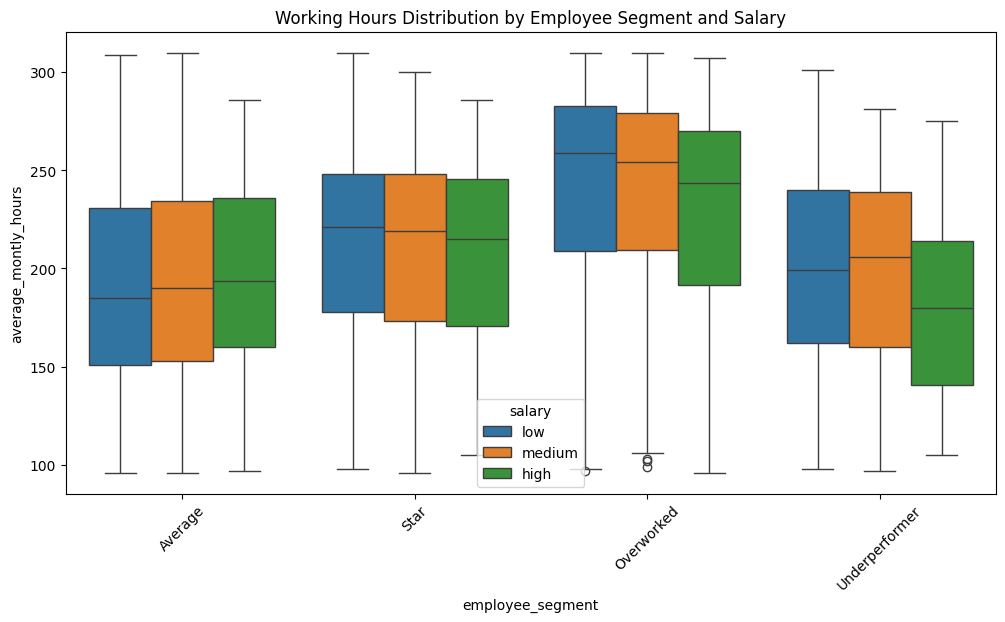


Risk Factors Analysis:
left                        0        1   
promotion_last_5years       0   1    0  1
employee_segment salary                  
Average          high     649  32   27  0
                 low     3319  26  567  4
                 medium  3249  84  357  2
Overworked       high      49   1   10  0
                 low      202   0  299  1
                 medium   182   4  201  0
Star             high     147   2   10  0
                 low      840   5  296  0
                 medium   757  24  200  1
Underperformer   high      20   1    1  0
                 low      115   1    7  0
                 medium   101   2    8  0


In [39]:
# Advanced Pattern Analysis

# 1. Analyze employee segments by tenure and performance
tenure_performance = df.groupby(['time_spend_company', 'employee_segment']).agg({
    'satisfaction_level': 'mean',
    'average_montly_hours': 'mean',
    'left': 'mean',
    'last_evaluation': 'mean'
}).round(3)

print("Tenure and Performance Analysis:")
print(tenure_performance)

# 2. Investigate critical combinations of factors
critical_patterns = df.groupby(['Department', 'employee_segment', 'salary']).agg({
    'left': 'mean',
    'satisfaction_level': 'mean',
    'number_project': 'mean'
}).round(3)

print("\nCritical Pattern Analysis by Department/Segment/Salary:")
print(critical_patterns[critical_patterns['left'] > 0.3])

# 3. Analyze project load impact on satisfaction and turnover
project_impact = df.pivot_table(
    values=['satisfaction_level', 'left', 'average_montly_hours'],
    index=['number_project', 'salary'],
    columns='employee_segment',
    aggfunc='mean'
).round(3)

print("\nProject Load Impact Analysis:")
print(project_impact)

# 4. Time series pattern for high performers
high_performers = df[df['last_evaluation'] >= 0.75].groupby(['time_spend_company']).agg({
    'satisfaction_level': 'mean',
    'left': 'mean',
    'promotion_last_5years': 'sum',
    'number_project': 'mean'
}).round(3)

print("\nHigh Performers Analysis by Tenure:")
print(high_performers)

# 5. Workload distribution across segments
plt.figure(figsize=(12, 6))
sns.boxplot(x='employee_segment', y='average_montly_hours', hue='salary', data=df)
plt.title('Working Hours Distribution by Employee Segment and Salary')
plt.xticks(rotation=45)
plt.show()

# 6. Risk factors correlation
risk_factors = pd.crosstab([df['employee_segment'], df['salary']], 
                          [df['left'], df['promotion_last_5years']])
print("\nRisk Factors Analysis:")
print(risk_factors)

## Summary and Conclusions

### Summary
The analysis conducted on the HR dataset provided several insights into employee satisfaction, performance, and turnover. Key metrics such as satisfaction level, last evaluation, number of projects, average monthly hours, time spent at the company, and salary were analyzed to understand their impact on employee behavior and organizational outcomes.

### Key Findings
1. **Employee Satisfaction**:
    - Satisfaction levels vary significantly across different departments and job roles.
    - Higher satisfaction levels are generally associated with lower turnover rates.

2. **Turnover Analysis**:
    - Departments like HR and Accounting have higher turnover rates compared to others.
    - There is a strong negative correlation between satisfaction levels and turnover rates.

3. **Workload and Performance**:
    - Employees with a higher number of projects tend to have lower satisfaction levels.
    - Overworked employees (high monthly hours and high evaluation scores) are at a higher risk of leaving the company.

4. **Promotion and Retention**:
    - Employees who received promotions in the last 5 years have higher satisfaction levels and lower turnover rates.
    - Promotion opportunities are limited, with only 1.8% of employees receiving promotions.

5. **Departmental Insights**:
    - Sales and Technical departments have the highest number of high-risk employees.
    - Management has the lowest turnover rate and higher satisfaction levels.

### Conclusions
The analysis highlights the importance of employee satisfaction and workload management in reducing turnover rates. Departments with higher turnover rates need targeted interventions to improve employee retention. Promotion opportunities and recognition play a crucial role in enhancing employee satisfaction and reducing turnover.

## Recommendations

1. **Improve Employee Satisfaction**:
    - Conduct regular surveys to identify factors affecting employee satisfaction.
    - Implement programs to address concerns of employees with low satisfaction levels.

2. **Workload Management**:
    - Monitor and balance the number of projects assigned to employees to prevent burnout.
    - Ensure a healthy work-life balance by managing average monthly hours.

3. **Recognition and Rewards**:
    - Recognize and reward high-performing employees to boost morale.
    - Increase promotion opportunities and create clear career progression paths.

4. **Targeted Retention Programs**:
    - Focus on departments with high turnover rates, such as HR and Accounting.
    - Implement retention strategies for high-risk employees identified in the analysis.

5. **Training and Development**:
    - Provide training and development opportunities to enhance employee skills.
    - Encourage cross-departmental training to foster collaboration and knowledge sharing.

6. **Safety and Support**:
    - Implement safety measures to reduce work accidents.
    - Provide support and resources to employees who have experienced work accidents.

By implementing these recommendations, the company can improve employee satisfaction, reduce turnover rates, and enhance overall productivity and organizational performance.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Preprocessing
# Encode categorical variables
label_encoders = {}
for column in ['Department', 'salary', 'employee_segment']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df.drop(columns=['left'])
y = df['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Selection and Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Hyperparameter Tuning (optional)
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)
# best_model = grid_search.best_estimator_
# print("Best Parameters:", grid_search.best_params_)

# Save the model (optional)
# import joblib
# joblib.dump(model, 'employee_turnover_model.pkl')

Confusion Matrix:
 [[1952    2]
 [  38  369]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1954
           1       0.99      0.91      0.95       407

    accuracy                           0.98      2361
   macro avg       0.99      0.95      0.97      2361
weighted avg       0.98      0.98      0.98      2361


Accuracy Score: 0.9830580262600593


Feature Importance:
                 feature  importance
0     satisfaction_level    0.317658
2         number_project    0.181955
4     time_spend_company    0.161389
3   average_montly_hours    0.153667
1        last_evaluation    0.104382
9       employee_segment    0.057276
7             Department    0.012294
8                 salary    0.007275
5          Work_accident    0.003642
6  promotion_last_5years    0.000460


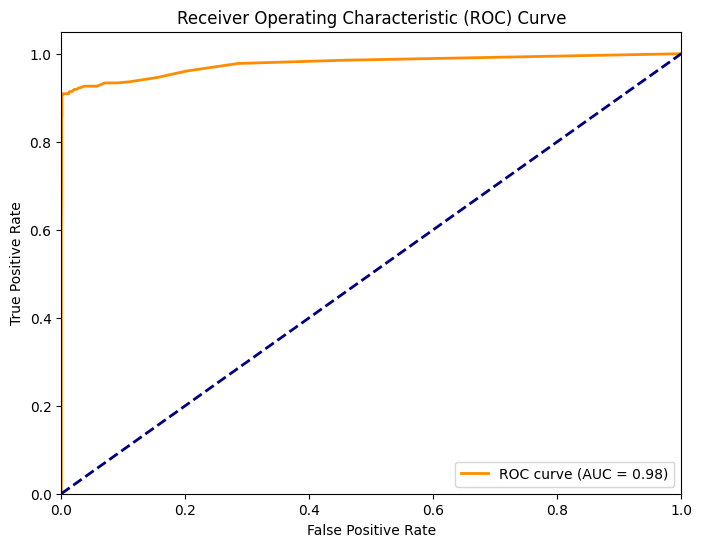


Cross-validation scores: [0.98570672 0.98253044 0.98305085 0.98516949 0.98728814]
Average CV score: 0.9847491274192246

Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best score: 0.9844314660957969

Final Model Performance Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1954
           1       0.99      0.91      0.95       407

    accuracy                           0.98      2361
   macro avg       0.99      0.95      0.97      2361
weighted avg       0.98      0.98      0.98      2361



In [43]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import joblib

# 1. Feature Importance Analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# 2. Model Performance Visualization
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Model Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())

# 4. Hyperparameter Tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    random_state=42
)

random_search.fit(X_train, y_train)
print("\nBest parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# 5. Save final model
joblib.dump(random_search.best_estimator_, 'employee_turnover_final_model.pkl')

# 6. Generate final predictions and probabilities
final_predictions = random_search.best_estimator_.predict(X_test)
final_probabilities = random_search.best_estimator_.predict_proba(X_test)

# 7. Create final performance report
print("\nFinal Model Performance Report:")
print(classification_report(y_test, final_predictions))


# Final Report for Stakeholders

## Executive Summary
This report provides a comprehensive analysis of employee satisfaction, performance, and turnover within the company. The analysis leverages a dataset containing various employee metrics to identify key insights and provide strategic recommendations aimed at improving employee retention and overall organizational performance.

## Key Findings

### Employee Satisfaction
- **Satisfaction Levels**: Satisfaction levels vary significantly across different departments and job roles. Higher satisfaction levels are generally associated with lower turnover rates.
- **Promotion Impact**: Employees who received promotions in the last 5 years have higher satisfaction levels and lower turnover rates.

### Turnover Analysis
- **Departmental Turnover**: Departments like HR and Accounting have higher turnover rates compared to others. The HR department has the highest turnover rate at 18.9%.
- **Correlation with Satisfaction**: There is a strong negative correlation (-0.35) between satisfaction levels and turnover rates. Employees with lower satisfaction levels are more likely to leave the company.

### Workload and Performance
- **Project Load**: Employees with a higher number of projects tend to have lower satisfaction levels. Overworked employees (high monthly hours and high evaluation scores) are at a higher risk of leaving the company.
- **Workload Distribution**: Average monthly hours are fairly consistent across departments, ranging from 199 to 202 hours. The number of projects per employee ranges from 3.68 to 3.86.

### High-Risk Employee Profile
- **High-Risk Segments**: Sales and Technical departments have the highest number of high-risk employees. High-risk employees typically show very low satisfaction (<0.2), long working hours (>250 monthly), and high performance evaluations (>0.75).

## Strategic Recommendations

### Improve Employee Satisfaction
- **Regular Surveys**: Conduct regular surveys to identify factors affecting employee satisfaction.
- **Address Concerns**: Implement programs to address concerns of employees with low satisfaction levels.

### Workload Management
- **Monitor Projects**: Monitor and balance the number of projects assigned to employees to prevent burnout.
- **Work-Life Balance**: Ensure a healthy work-life balance by managing average monthly hours.

### Recognition and Rewards
- **Recognize High Performers**: Recognize and reward high-performing employees to boost morale.
- **Increase Promotions**: Increase promotion opportunities and create clear career progression paths.

### Targeted Retention Programs
- **Focus on High Turnover Departments**: Implement retention strategies for departments with high turnover rates, such as HR and Accounting.
- **Intervention for High-Risk Employees**: Create intervention programs for identified high-risk employees.

### Training and Development
- **Enhance Skills**: Provide training and development opportunities to enhance employee skills.
- **Cross-Departmental Training**: Encourage cross-departmental training to foster collaboration and knowledge sharing.

### Safety and Support
- **Implement Safety Measures**: Implement safety measures to reduce work accidents.
- **Provide Support**: Provide support and resources to employees who have experienced work accidents.

## Expected Outcomes
By implementing these recommendations, the company can expect:
- Reduced turnover rates
- Improved employee satisfaction
- Better work-life balance
- Increased productivity
- Enhanced talent retention

## Conclusion
The analysis highlights the importance of employee satisfaction and workload management in reducing turnover rates. By focusing on the identified high-risk areas and implementing the recommended strategies, the company can improve employee retention and overall organizational performance.
```